Воспользуемся данными по Марвел.

Первичный источник данных [Marvel Wikia](http://marvel.wikia.com/Main_Page)

[Скачиваем данные](https://github.com/fivethirtyeight/data/blob/master/comic-characters/marvel-wikia-data.csv)  (кнопка Download)

Variable | Definition
---|---------
page_id | Уникальный идентификатор персонажа на странице wikia
name | Имя персонажа
urlslug | Уникальный url в wikia который ведет к этому персонажу
ID | Идентификационный статус персонажа (Secret Identity, Public identity, [on marvel only: No Dual Identity])
ALIGN | Характиристика персонажа (Good, Bad or Neutral)
EYE | Цвет глаз
HAIR | Цвет волос
SEX | Пол персонажа (e.g. Male, Female, etc.)
GSM | Относится ли персонаж к сексуальному меньшинсву (e.g. Homosexual characters, bisexual characters)
ALIVE | Жив ли персонаж
APPEARANCES | Количество появлений персонажа в комиксах (на момент Sep. 2, 2014)
FIRST APPEARANCE | Месяц и год первого появления персонажа в комиксе
YEAR | Год первого появления персонажа в комиксе

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/DATA SCIENCE/marvel-wikia-data.csv")

In [ ]:
data.sample(15)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
3892,17091,Lord Templar (Tremont) (Earth-616),\/Lord_Templar_(Tremont)_(Earth-616),NaN,Bad Characters,Red Eyes,Black Hair,Male Characters,NaN,Living Characters,8.0,Feb-99,1999.0
2997,1731,Alphonsus Lefszycic (Earth-616),\/Alphonsus_Lefszycic_(Earth-616),Secret Identity,Good Characters,NaN,Blond Hair,Male Characters,NaN,Living Characters,11.0,May-87,1987.0
13328,498737,Robert Nazario (Earth-616),\/Robert_Nazario_(Earth-616),NaN,NaN,NaN,Black Hair,Male Characters,NaN,Deceased Characters,1.0,Jun-93,1993.0
14308,387140,Paul Aristides (Earth-616),\/Paul_Aristides_(Earth-616),Public Identity,NaN,Brown Eyes,Black Hair,Male Characters,NaN,Living Characters,1.0,May-05,2005.0
12894,19531,Teacher (Earth-616),\/Teacher_(Earth-616),Secret Identity,Bad Characters,NaN,NaN,NaN,NaN,Living Characters,1.0,Mar-89,1989.0
9056,32563,Sheila Danning (Earth-616),\/Sheila_Danning_(Earth-616),NaN,Bad Characters,NaN,Red Hair,Female Characters,NaN,Living Characters,2.0,Aug-83,1983.0
13319,529326,Phil Donahue (Earth-616),\/Phil_Donahue_(Earth-616),Public Identity,Neutral Characters,NaN,White Hair,Male Characters,NaN,Living Characters,1.0,Nov-93,1993.0
12691,555122,Gerhart (Earth-616),\/Gerhart_(Earth-616),Public Identity,Neutral Characters,NaN,Blond Hair,Male Characters,NaN,Deceased Characters,1.0,Dec-87,1987.0
4866,16507,Odysseus Indigo (Earth-616),\/Odysseus_Indigo_(Earth-616),Secret Identity,Neutral Characters,NaN,Bald,Male Characters,NaN,Living Characters,6.0,Oct-98,1998.0
6425,235983,Martin Dennis (Earth-616),\/Martin_Dennis_(Earth-616),NaN,Good Characters,NaN,Black Hair,Male Characters,NaN,Living Characters,4.0,Jun-94,1994.0


1. Построим сводную таблицу для датасета по признакам ALIGN и ALIVE, вычисляя их среднее по количеству появлений APPEARANCES

* В среднем появлений живых плохих персонажей `больше`, чем появлений умерших плохих 

* В среднем появлений живых плохих персонажей `меньше`, чем появлений живых хороших (с чем это может быть связано?) Может быть связано с тем, что зрителю чаще хотят показать позитивных героев, чем злодеев.

* Хороших и нейтральных персонажей `в отдельности гораздо меньше`, `а если суммарно, то немногим больше`. `Видимо так гораздо легче организовывать (описывать, снимать) бесконечное противостояние добра против зла, и чаще показывать убийство злых персонажей, для торжества киношной справедливости.`

In [ ]:
data_stats = data.pivot_table(values='APPEARANCES', columns=['ALIGN', 'ALIVE'], aggfunc='mean')
data_stats

ALIGN            Bad Characters  ... Neutral Characters
ALIVE       Deceased Characters  ...  Living Characters
APPEARANCES            8.307278  ...          22.181818

[1 rows x 6 columns]

In [ ]:
pd.crosstab(data['ALIGN'], data['ALIVE'])

ALIVE,Deceased Characters,Living Characters
ALIGN,,
Bad Characters,1929,4791
Good Characters,843,3793
Neutral Characters,527,1681


In [ ]:
data['ALIGN'].describe()

count              13564
unique                 3
top       Bad Characters
freq                6720
Name: ALIGN, dtype: object

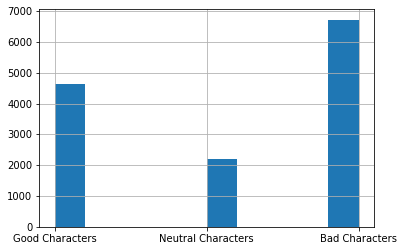

In [ ]:
data['ALIGN'].hist()

In [ ]:
data['ALIGN'].count()

13564

In [ ]:
data [data['ALIGN'] == 'Bad Characters']['ALIGN'].count()

6720

In [ ]:
data [(data['ALIGN'] == 'Good Characters') | (data['ALIGN'] == 'Neutral Characters')]['ALIGN'].count()

6844

То же, но с помощью groupby:

In [ ]:
data.sample(8)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
14160,596382,Joey Cascio (Earth-616),\/Joey_Cascio_(Earth-616),Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Deceased Characters,1.0,Mar-03,2003.0
14719,503115,Salome (Earth-616),\/Salome_(Earth-616),Public Identity,Bad Characters,Blue Eyes,Black Hair,Female Characters,NaN,Deceased Characters,1.0,Aug-09,2009.0
5429,300179,Stern (Firm) (Earth-616),\/Stern_(Firm)_(Earth-616),Secret Identity,Bad Characters,NaN,NaN,Male Characters,NaN,Living Characters,5.0,May-92,1992.0
13915,16448,Fugue (Morlock) (Earth-616),\/Fugue_(Morlock)_(Earth-616),Secret Identity,Neutral Characters,NaN,NaN,NaN,NaN,Living Characters,1.0,Dec-00,2000.0
15051,250544,Carlos McNally (Earth-616),\/Carlos_McNally_(Earth-616),NaN,Bad Characters,NaN,Black Hair,Male Characters,NaN,Living Characters,1.0,NaN,NaN
4506,10484,Donald Birch (Earth-616),\/Donald_Birch_(Earth-616),Secret Identity,Bad Characters,Brown Eyes,Bald,Male Characters,NaN,Deceased Characters,6.0,Mar-65,1965.0
12196,735423,Lamilm Gor (Earth-616),\/Lamilm_Gor_(Earth-616),No Dual Identity,NaN,NaN,Black Hair,Male Characters,NaN,Living Characters,1.0,Nov-76,1976.0
11595,552866,Nagorbu (Earth-616),\/Nagorbu_(Earth-616),Public Identity,Bad Characters,NaN,Brown Hair,Male Characters,NaN,Living Characters,1.0,Apr-49,1949.0


In [ ]:
data_stat2 = data[['ALIGN', 'ALIVE', 'APPEARANCES']].groupby('ALIGN')
data_stat2.groups.keys()

dict_keys(['Bad Characters', 'Good Characters', 'Neutral Characters'])

In [ ]:
data_stat2_1 = data_stat2.get_group('Bad Characters').groupby('ALIVE')
data_stat2_1.mean()

,APPEARANCES
ALIVE,
Deceased Characters,8.307278
Living Characters,8.338893


In [ ]:
data_stat2_1.count()

,ALIGN,APPEARANCES
ALIVE,,
Deceased Characters,1929,1855
Living Characters,4791,4497


In [ ]:
data_stat2_2 = data_stat2.get_group('Good Characters').groupby('ALIVE')
data_stat2_2.mean()

,APPEARANCES
ALIVE,
Deceased Characters,24.218905
Living Characters,37.401882


In [ ]:
data_stat2_2.count()

,ALIGN,APPEARANCES
ALIVE,,
Deceased Characters,843,804
Living Characters,3793,3506


In [ ]:
data_stat2_3 = data_stat2.get_group('Neutral Characters').groupby('ALIVE')
data_stat2_3.mean()

,APPEARANCES
ALIVE,
Deceased Characters,11.467871
Living Characters,22.181818


In [ ]:
data_stat2_3.count()

,ALIGN,APPEARANCES
ALIVE,,
Deceased Characters,527,498
Living Characters,1681,1595


2. Создадим excel таблицу с графиками. Найдем данные за январь 2019 и 2018 года и построим обычные графики изменения температур:


In [ ]:
# https://docs.google.com/spreadsheets/d/1f_V2dC3UOZ-RMqi0omLckylmfEUAihE9/edit?usp=sharing&ouid=115100006214244578564&rtpof=true&sd=true первый источник
# Скачивание файла (подставить свою ссылку https://rp5.ru/) второй источник
!wget -O "weather.xls.gz" "http://93.90.217.252/download/files.synop/34/34927.22.03.2006.05.02.2022.1.0.0.ru.utf8.00000000.xls.gz"

--2022-02-07 01:54:41--  http://93.90.217.252/download/files.synop/34/34927.22.03.2006.05.02.2022.1.0.0.ru.utf8.00000000.xls.gz
Connecting to 93.90.217.252:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2912239 (2.8M) [application/octet-stream]
Saving to: ‘weather.xls.gz’

weather.xls.gz      100%[===================>]   2.78M   508KB/s    in 5.8s    

2022-02-07 01:54:48 (486 KB/s) - ‘weather.xls.gz’ saved [2912239/2912239]



In [ ]:
# Распаковка архива
!gzip -df "weather.xls.gz"

In [ ]:
import xlrd 
    
# Откроем файл
wb = xlrd.open_workbook("/content/weather.xls") 
sheet = wb.sheet_by_index(0) 
  
# Посмотрим, что находится на позиции [0, 0]
print(sheet.cell_value(0, 0), '\n')
  
# Количество строк
print(sheet.nrows, '\n') 

# Количество столбцов
print(sheet.ncols, '\n') 

# Выведем названия столбцов
for i in range(sheet.ncols): 
    print(sheet.cell_value(6, i)) 
print()

# # Выведем первую строку
# print(sheet.row_values(1)) 

# Метеостанция Краснодар / Круглик, Россия, WMO_ID=34927, выборка с 22.03.2006 по 05.02.2022, все дни 

37333 

29 

Местное время в Краснодаре / Круглике
T
Po
P
Pa
U
DD
Ff
ff10
ff3
N
WW
W1
W2
Tn
Tx
Cl
Nh
H
Cm
Ch
VV
Td
RRR
tR
E
Tg
E'
sss



In [ ]:
arr1_0 = [0]*sheet.nrows #ok
for i in range(sheet.nrows):
  arr1_0[i] = [0]*2

for i in range(7,sheet.nrows):
  arr1_0[i][0] = sheet.cell_value(i, 0)
  arr1_0[i][1] = sheet.cell_value(i, 1)

In [ ]:
df1_0 = pd.DataFrame(arr1_0[7:], columns=['timestamp', 'temperature']) 

In [ ]:
df1_0.dtypes

timestamp      object
temperature    object
dtype: object

In [ ]:
df1_0['timestamp'] = pd.to_datetime(df1_0['timestamp'], dayfirst=True)

In [ ]:
df1_0['temperature'] = pd.to_numeric(df1_0['temperature'])

In [ ]:
df1_0.dtypes

timestamp      datetime64[ns]
temperature           float64
dtype: object

In [ ]:
df_jan_2019 = df1_0[df1_0['timestamp'].between('2019-01-01 00:00:00','2019-01-31 21:00:00')]
df_jan_2019.sort_values(by='timestamp', inplace=True, ignore_index=True)
df_jan_2019.fillna(method="ffill", inplace=True)
df_jan_2019

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,timestamp,temperature
0,2019-01-01 00:00:00,3.1
1,2019-01-01 03:00:00,2.7
2,2019-01-01 06:00:00,2.2
3,2019-01-01 09:00:00,1.7
4,2019-01-01 12:00:00,1.4
...,...,...
243,2019-01-31 09:00:00,1.3
244,2019-01-31 12:00:00,6.9
245,2019-01-31 15:00:00,9.9
246,2019-01-31 18:00:00,7.3


In [ ]:
df_jan_2018 = df1_0[df1_0['timestamp'].between('2018-01-01 00:00:00','2018-01-31 21:00:00')]
df_jan_2018.sort_values(by='timestamp', inplace=True, ignore_index=True)
df_jan_2018

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,timestamp,temperature
0,2018-01-01 00:00:00,8.4
1,2018-01-01 03:00:00,7.7
2,2018-01-01 06:00:00,7.8
3,2018-01-01 09:00:00,7.4
4,2018-01-01 12:00:00,5.9
...,...,...
241,2018-01-31 09:00:00,3.3
242,2018-01-31 12:00:00,5.3
243,2018-01-31 15:00:00,5.7
244,2018-01-31 18:00:00,3.7


In [ ]:
pip install xlsxwriter

In [ ]:
import xlsxwriter 

workbook = xlsxwriter.Workbook('/content/weather_chart.xlsx') 
worksheet = workbook.add_worksheet() 
  
# Создаем стили ячеек
bold = workbook.add_format({'bold': 1}) 
  
# Списки с заголовками и данными
headings2018 = ['Number 2018', 'Timestamp 2018', 'Temperature 2018'] 
headings2019 = ['Number 2019', 'Timestamp 2019', 'Temperature 2019'] 

# Расширяем первые шесть столбцов
worksheet.set_column('A:A', 20)
worksheet.set_column('B:B', 20)
worksheet.set_column('C:C', 20)

worksheet.set_column('E:E', 20)
worksheet.set_column('F:F', 20)
worksheet.set_column('G:G', 20)

  
# Пишем строку в файл
worksheet.write_row('A1', headings2018, bold) 
worksheet.write_row('E1', headings2019, bold) 
  
format_datetime = workbook.add_format({'num_format': 'dd/mm/yy hh:mm'})

# Пишем столбцы в файл
worksheet.write_column('A2', df_jan_2018.index.values) 
worksheet.write_column('B2', df_jan_2018['timestamp'], format_datetime) 
worksheet.write_column('C2', df_jan_2018['temperature']) 

worksheet.write_column('E2', df_jan_2019.index.values) 
worksheet.write_column('F2', df_jan_2019['timestamp'], format_datetime) 
worksheet.write_column('G2', df_jan_2019['temperature']) 
  
# Создаем графики типа 'scatter'
chart2018 = workbook.add_chart({'type': 'scatter'}) 
chart2019 = workbook.add_chart({'type': 'scatter'}) 


# # Записываем данные в chart2018 и chart2019
chart2018.add_series({ 
    'name':       ['Sheet1', 0, 2], 
    'categories': ['Sheet1', 1, 1, 246, 1], 
    'values':     ['Sheet1', 1, 2, 246, 2], 
}) 
  
chart2019.add_series({ 
    'name':       ['Sheet1', 0, 6], 
    'categories': ['Sheet1', 1, 5, 248, 5], 
    'values':     ['Sheet1', 1, 6, 248, 6], 
})


# # Подписываем графики и оси 
chart2018.set_title ({'name': 'Air Temperature in Krasnodar on January 2018'}) 
chart2018.set_x_axis({'name': 'Timestamp'}) 
chart2018.set_y_axis({'name': 'Temperature, C'}) 

chart2019.set_title ({'name': 'Air Temperature in Krasnodar on January 2019'}) 
chart2019.set_x_axis({'name': 'Timestamp'}) 
chart2019.set_y_axis({'name': 'Temperature, C'}) 
  
chart2018.set_size({'width': 1200, 'height': 200})
chart2019.set_size({'width': 1200, 'height': 200})

chart2018.set_size({'x_scale': 2, 'y_scale': 2})
chart2019.set_size({'x_scale': 2, 'y_scale': 2})


# # Рисуем графики в документе
worksheet.insert_chart('I2', chart2018) 
worksheet.insert_chart('I23', chart2019) 
  
workbook.close() 

3.Соберем в одну таблицу все данные с сайта https://ru.wikipedia.org/wiki/Хронология_отмены_рабства_и_крепостного_права_по_странам. Отобразим ее.

Проследим изменения по России, выведем все данные по нашей стране.

Определим: где рабство было отменено последним, первым и сколько лет прошло между этими событиями.

In [ ]:
import pandas as pd

list1 = pd.read_html('https://ru.wikipedia.org/wiki/%D0%A5%D1%80%D0%BE%D0%BD%D0%BE%D0%BB%D0%BE%D0%B3%D0%B8%D1%8F_%D0%BE%D1%82%D0%BC%D0%B5%D0%BD%D1%8B_%D1%80%D0%B0%D0%B1%D1%81%D1%82%D0%B2%D0%B0_%D0%B8_%D0%BA%D1%80%D0%B5%D0%BF%D0%BE%D1%81%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D0%BF%D1%80%D0%B0%D0%B2%D0%B0_%D0%BF%D0%BE_%D1%81%D1%82%D1%80%D0%B0%D0%BD%D0%B0%D0%BC', encoding='utf-8')


In [ ]:
type(list1)

list

In [ ]:
list1

[                   Год  ...                                         Примечание
 0  кон. VIII в.до н.э.  ...  Бокхорис отменяет долговое рабство для египтян...
 1    нач. VI в.до н.э.  ...  Солон отменяет долговое рабство и освобождает ...
 2           539до н.э.  ...                                                [1]
 3           376до н.э.  ...                                                NaN
 4        III в.до н.э.  ...  Ашока объявил об отмене работорговли и призвал...
 5       221—206до н.э.  ...                                                NaN
 6                 9—12  ...                                                NaN
 
 [7 rows x 5 columns],
          Год  ...                                         Примечание
 0    ок. 500  ...  Рабство (или по крайней мере работорговля) на ...
 1        960  ...  Пьетро IV Кандиано через год после своего избр...
 2       1080  ...  Вильгельм Завоеватель ограничил вывоз рабов из...
 3       1080  ...  Вильгельм Завоеватель ограничил выв

In [ ]:
df2_0 = pd.concat([list1[0], list1[1], list1[2], list1[3]], ignore_index=True, axis=0)

Хронология отмены рабства и крепостного права по странам:

In [ ]:
df2_0

,Год,Страна,Статус,Причина,Примечание
0,кон. VIII в.до н.э.,Египет,Частично отменено,NaN,Бокхорис отменяет долговое рабство для египтян...
1,нач. VI в.до н.э.,Афины,Частично отменено,NaN,Солон отменяет долговое рабство и освобождает ...
2,539до н.э.,Держава Ахеменидов,Частично отменено,NaN,[1]
3,376до н.э.,Римская республика,Частично отменено,NaN,NaN
4,III в.до н.э.,Империя Маурьев,Частично отменено,NaN,Ашока объявил об отмене работорговли и призвал...
...,...,...,...,...,...
329,2006,Черногория,Подписано соглашение,Конвенция о рабстве 1926 года,NaN
330,2007,Мавритания,Рабовладение запрещено,NaN,[59]
331,2007,Парагвай,Подписано соглашение,Конвенция о рабстве 1926 года,NaN
332,2008,Казахстан,Подписано соглашение,Конвенция о рабстве 1926 года,NaN


Хронология отмены рабства и крепостного права в России:

In [ ]:
countries = ['Великое княжество Московское', 'Русское царство', 'Российская империя', 'Крым (рос.)', 'Россия', 'Царство Польское (рос.)', 'Эстляндия (рос.)', 'Курляндия (рос.)', 'Лифляндия (рос.)', 'СССР', 'Белорусская ССР', 'Украинская ССР', 'Абхазия (рос.)']

df2_2 = pd.DataFrame()
for i in countries:
  df2_1 = df2_0[df2_0.Страна.str.startswith(i)]
  df2_2 = df2_2.append(df2_1)
df2_2.reset_index(drop=True, inplace = True)
df2_2

,Год,Страна,Статус,Причина,Примечание
0,1497,Великое княжество Московское,Крепостное право частично введено,Судебник 1497 года,Судебник 1497 года стал первым российским зако...
1,1592?,Русское царство,Крепостное право введено?,Указ Бориса Годунова?,По мнению русского историка В. Н. Татищева кре...
2,1649,Русское царство,Крепостное право введено окончательно,Соборное уложение 1649 года,Бессрочный сыск беглых крестьян.
3,1723,Российская империя,Частично отменено,NaN,"Пётр I отменяет холопство на Руси, при этом кр..."
4,1797,Российская империя,Крепостное право ограничено,Манифест о трёхдневной барщине,Ограничил срок работы крепостного крестьянина ...
5,1833,Российская империя,Крепостное право ограничено,указ Николая I от 2 (14) мая,Запрещал продавать крепостных крестьян с публи...
6,1783,Крым (рос.),Рабство отменено,Присоединение Крыма к Российской империи,[28]
7,1815,Россия,Подписано соглашение,Венский конгресс,[41]
8,1861,Россия,Крепостное право отменено,Крестьянская реформа в России,см. статью
9,1890,Россия,Подписано соглашение,Генеральный акт Брюссельской конференции (от 2...,NaN


Работорговля впервые была запрещена в 500 году 	в Ирландии, а крепостное право впервые отменено в 1100 году	в Нормандии. Рабство было отменено последним в 2013	году в США. Между началом отмены рабства и ее окончанием прошло 913 лет:

In [ ]:
df2_3 = df2_0.dropna(subset=['Статус'])
df2_3

,Год,Страна,Статус,Причина,Примечание
0,кон. VIII в.до н.э.,Египет,Частично отменено,NaN,Бокхорис отменяет долговое рабство для египтян...
1,нач. VI в.до н.э.,Афины,Частично отменено,NaN,Солон отменяет долговое рабство и освобождает ...
2,539до н.э.,Держава Ахеменидов,Частично отменено,NaN,[1]
3,376до н.э.,Римская республика,Частично отменено,NaN,NaN
4,III в.до н.э.,Империя Маурьев,Частично отменено,NaN,Ашока объявил об отмене работорговли и призвал...
...,...,...,...,...,...
329,2006,Черногория,Подписано соглашение,Конвенция о рабстве 1926 года,NaN
330,2007,Мавритания,Рабовладение запрещено,NaN,[59]
331,2007,Парагвай,Подписано соглашение,Конвенция о рабстве 1926 года,NaN
332,2008,Казахстан,Подписано соглашение,Конвенция о рабстве 1926 года,NaN


In [ ]:
slavery = ['Рабство отменено', 'Крепостное право отменено', 'Работорговля запрещена', 'Отменено', 'Рабство отменено в колониях', 'Пеонаж запрещён', 'Рабовладение запрещено']

df2_5 = pd.DataFrame()
for i in slavery:
  df2_4 = df2_3[df2_3.Статус.str.startswith(i)]
  df2_5 = df2_5.append(df2_4)

df2_5['Год'] = df2_5['Год'].replace('ок. ','',regex=True)
df2_5['Год'] = pd.to_numeric(df2_5['Год'])
df2_5.sort_values(by=['Год'], inplace = True)
df2_5.reset_index(drop=True, inplace = True)
df2_5

,Год,Страна,Статус,Причина,Примечание
0,500,Ирландия,Работорговля запрещена,NaN,Рабство (или по крайней мере работорговля) на ...
1,960,Венецианская республика,Работорговля запрещена,NaN,Пьетро IV Кандиано через год после своего избр...
2,1100,Нормандия,Крепостное право отменено,NaN,[4]
3,1117,Исландия,Рабство отменено,NaN,На несколько столетий рабство было отменено[7]...
4,1214,Корчула[8],Рабство отменено,Корчуланский устав,[9]
...,...,...,...,...,...
115,1970,Оман,Рабство отменено,NaN,[55]
116,1981,Мавритания,Рабство отменено,NaN,"Последняя страна, официально отменившая рабств..."
117,2003,Нигер,Рабовладение запрещено,NaN,[53]
118,2007,Мавритания,Рабовладение запрещено,NaN,[59]


In [ ]:
Time = df2_5['Год'][119] - df2_5['Год'][2]
Time

913